Домашнее задание "Проблемы качества данных"

# 1. Масштабирование:


# а. Нормализовать признак - median_income

In [1]:
HOUSING_PATH = "data/housing.csv"

In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

housing = pd.read_csv(HOUSING_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
min_max_median_income = preprocessing.MinMaxScaler(feature_range=(0,1))

np_median_income = min_max_median_income.fit_transform(housing[['median_income']])
df_norm = pd.DataFrame(np_median_income)
print(df_norm[:10])

          0
0  0.539668
1  0.538027
2  0.466028
3  0.354699
4  0.230776
5  0.243921
6  0.217873
7  0.180694
8  0.108998
9  0.220087


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7d00f8860>]],
      dtype=object)

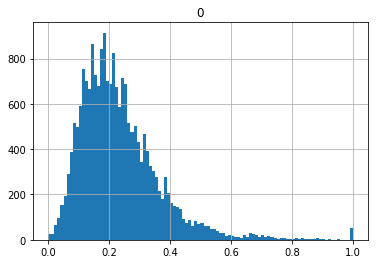

In [177]:
df_norm.hist(bins=100)

# б. Привести признак - population к масштабу от 0 до 100

In [178]:
minmax_population = preprocessing.MinMaxScaler(feature_range=(0,100))

scaler_population = minmax_population.fit_transform(housing[['population']])
df_pop = pd.DataFrame(scaler_population)
print(df_pop[:10])

          0
0  0.894083
1  6.721040
2  1.381765
3  1.555537
4  1.575156
5  1.149135
6  3.057821
7  3.234396
8  3.371731
9  4.338687


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7d42992e8>]],
      dtype=object)

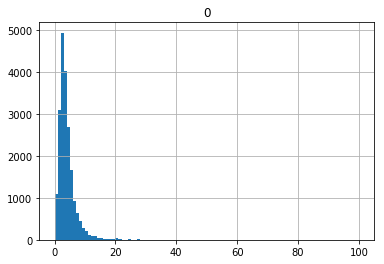

In [179]:
df_pop.hist(bins=100)

# 2. Заполнение пропусков:
Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца ocean_proximity
Например, если пропущенно значение в строке с категорией INLAND, нужно заполнить его средним значением по этой категории

In [4]:
housing[['ocean_proximity', 'total_bedrooms']].groupby('ocean_proximity').mean()

,total_bedrooms
ocean_proximity,
<1H OCEAN,546.539185
INLAND,533.881619
ISLAND,420.400000
NEAR BAY,514.182819
NEAR OCEAN,538.615677


In [5]:
mean_bedrooms_by_ocean_proximity = housing[['ocean_proximity', 'total_bedrooms']].groupby('ocean_proximity').mean().reset_index()

In [6]:
mean_bedrooms_by_ocean_proximity

,ocean_proximity,total_bedrooms
0,<1H OCEAN,546.539185
1,INLAND,533.881619
2,ISLAND,420.400000
3,NEAR BAY,514.182819
4,NEAR OCEAN,538.615677


In [9]:
housing['total_bedrooms2'] = housing.apply(lambda x: list(mean_bedrooms_by_ocean_proximity[mean_bedrooms_by_ocean_proximity.ocean_proximity == x.ocean_proximity]['total_bedrooms'])[0] if np.isnan(x.total_bedrooms) else x.total_bedrooms, axis=1)

In [12]:
#Исходные данные имели 207 пустых значений в столбце total_bedrooms:
housing.total_bedrooms.value_counts(dropna = False).iloc[:10]

NaN       207
 280.0     55
 331.0     51
 345.0     50
 393.0     49
 343.0     49
 394.0     48
 328.0     48
 348.0     48
 272.0     47
Name: total_bedrooms, dtype: int64

In [15]:
#После заполнения средними значениями пустых значений нет:
housing.total_bedrooms2.value_counts(dropna = False).iloc[:10]

546.539185    102
280.000000     55
533.881619     55
331.000000     51
345.000000     50
393.000000     49
343.000000     49
348.000000     48
328.000000     48
394.000000     48
Name: total_bedrooms2, dtype: int64

# 3. Категорийные атрибуты:


# а. Посчитать среднее кол-во комнат в строке (total_rooms/households)

In [180]:
rooms_stats = housing.filter(items = ['total_rooms', 'households'])
rooms_stats.head()

,total_rooms,households
0,880.0,126.0
1,7099.0,1138.0
2,1467.0,177.0
3,1274.0,219.0
4,1627.0,259.0


In [181]:
rooms_stats2 = (rooms_stats['total_rooms'] / rooms_stats['households'])
rooms_stats2.head()

0    6.984127
1    6.238137
2    8.288136
3    5.817352
4    6.281853
dtype: float64

# б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)

In [182]:
rooms_stats3 = pd.DataFrame(rooms_stats2, columns=['rooms'])
rooms_stats3.head()

,rooms
0,6.984127
1,6.238137
2,8.288136
3,5.817352
4,6.281853


In [183]:
def rooms_class(row):
    if row['rooms'] <= 3.0:
        rooms_class_i = 'Небольшой дом'
    if row['rooms'] <= 6.0:
        rooms_class_i = 'Средний дом'
    else:
        rooms_class_i = 'Большой дом'
    return rooms_class_i

In [184]:
rooms_stats3['rooms_class'] = rooms_stats3.apply(rooms_class, axis=1)
rooms_stats3.sort_values('rooms_class').head()

,rooms,rooms_class
0,6.984127,Большой дом
11178,7.023529,Большой дом
11172,6.058824,Большой дом
11137,6.317204,Большой дом
11131,7.115894,Большой дом
